Case 1: Geberal Formula (without padding and strides)

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten
from keras.models import Sequential, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

CNN Model Without using padding and strides

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding = 'valid'))

model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


Applying Padding method

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size = (3,3), activation ='relu', padding ='same' , input_shape = (28,28,1)))
model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', padding = 'same',))

model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])



Strides

In [ ]:
mdoel = Sequential()

model.add(Conv2D(16, kernel_size = (3,3), activation ='relu', strides = 2, input_shape = (28,28,1)))
model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', strides = 2))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])



Padding and straide

In [ ]:
mdoel = Sequential()

model.add(Conv2D(16, kernel_size = (3,3), activation ='relu', strides = 2, padding = 'same', input_shape = (28,28,1)))
model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


Data Augmentation Method

In [ ]:
from keras.preprocessing.image import ImageDataGenerator # Data Augmentation Package/library

from keras.utils import img_to_array, array_to_img, load_img
import numpy as np
import matplotlib.pyplot as plt


ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.10/dist-packages/keras/api/preprocessing/image/__init__.py)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Data Augmentation Package/library

from tensorflow.keras.utils import img_to_array, array_to_img, load_img # Changed import statement to include tensorflow
import numpy as np
import matplotlib.pyplot as plt

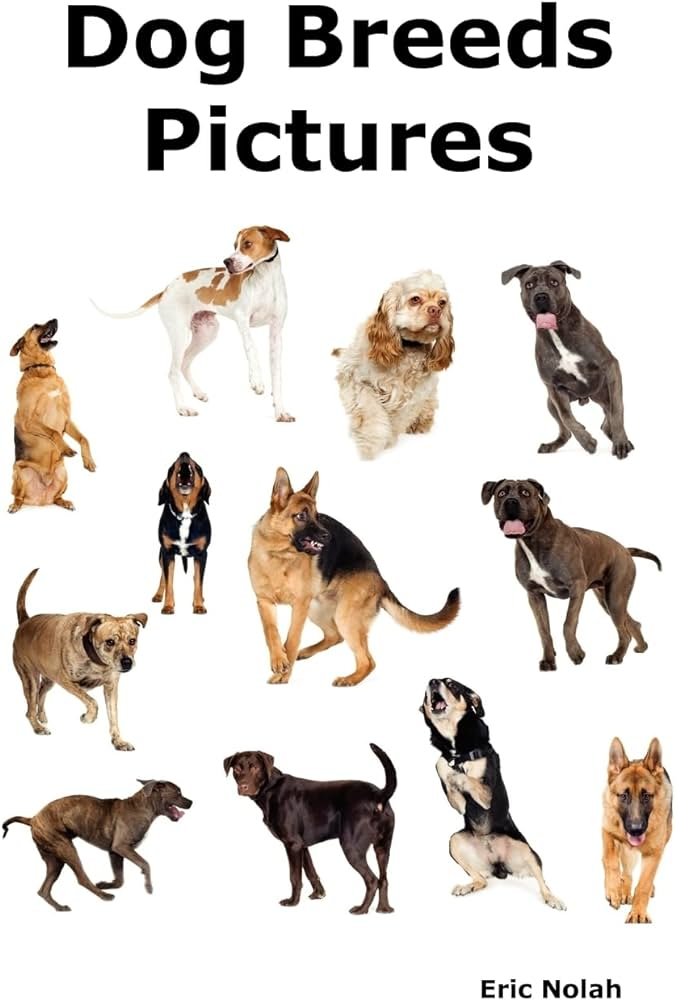

In [ ]:
image_file = '/content/dog.jpg'

dog_image = keras.preprocessing.image.load_img(image_file)
dog_image


In [ ]:
dog_image = img_to_array(dog_image)
dog_image

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
# Deifining image vs Transforming image

def plot_image(original_image, updated_image):
  fig = plt.figure(figsize = (10,5))

  plt.subplot(1,2,1)
  plt.title('Original Image')
  plt.imshow(original_image)

  plt.subplot(1,2,2)
  plt.title('Updated Image')
  plt.imshow(updated_image)

  plt.show()



tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode=&#x27;nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    interpolation_order=1,
    dtype=None
)

# Flip an image

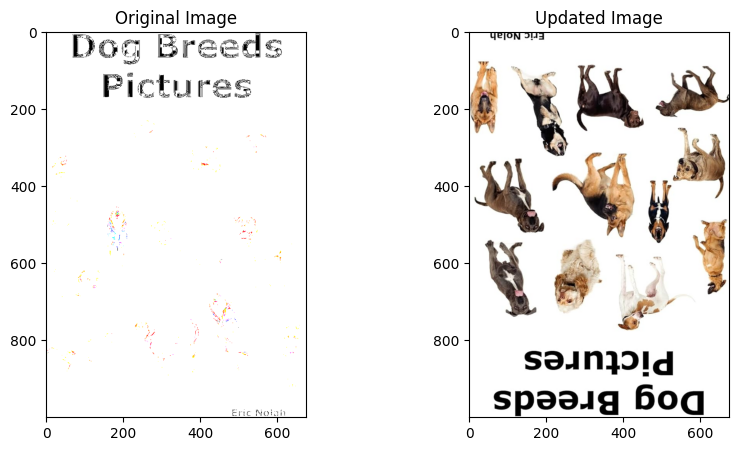

In [ ]:
transform_fn = keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
transform_params = transform_fn.random_transform(dog_image)
transformed_image = array_to_img(transform_params)
plot_image(dog_image, transformed_image)

Applying multiple tranforms

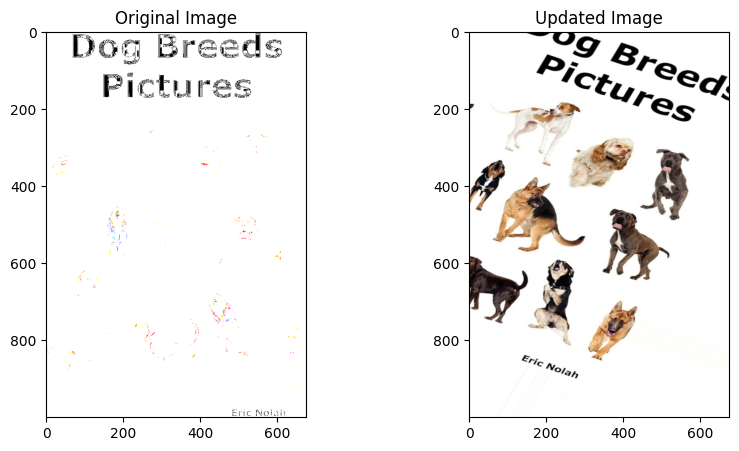

In [ ]:
transform_fn = keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True, vertical_flip = True, rotation_range = 30, height_shift_range=0.2, width_shift_range=0.2, zoom_range=0.3, shear_range=0.2 )
transform_params = transform_fn.random_transform(dog_image)

transformed_image = array_to_img(transform_params)
plot_image(dog_image, transformed_image)

In [ ]:
dog.shape

(1, 1000, 676, 3)

In [ ]:
dog = dog_image.reshape((1,) + dog_image.shape)
dog.shape

(1, 1000, 676, 3)

In [ ]:
agumentation = keras.preprocessing.image.ImageDataGenerator(horizontal_flip = True, vertical_flip = True, rotation_range = 30, height_shift_range=0.2, width_shift_range=0.2, zoom_range=0.3, shear_range=0.2, rescale=1/255.0 )

directory = '/content/sample_data'
i = 0
for batch in agumentation.flow(dog, batch_size = 1, save_to_dir = directory, save_prefix = 'dog', save_format = 'jpeg'):
  i+=1
  if i>20:
    break

Pooling layer - Adding MaxPooling Layer to reduce Parameter

In [ ]:
from keras.layers import MaxPooling2D

model = Sequential()
model.add(Conv2D(25, kernel_size=(3,3), strides = 2, padding ='same' , activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))
model.add(Conv2D(25, kernel_size=(3,3),strides=2, padding ='same' , activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])